In [1]:
import sys
sys.path.append('..')   # .. 表示上级目录（即当前目录的父目录）

from src.dataset import get_loaders1, get_loaders2
import matplotlib.pyplot as plt
import torch

### 1. 获取 DataLoader

In [2]:
train_loader, val_loader = get_loaders1(data_root='../data', stage='liver', batch_size=2, cache=False)   # cache=False 是为了测试时不等待缓存，直接跑

数据准备完成: 总数 111 | 训练集 88 | 验证集 23


monai.transforms.spatial.dictionary Orientationd.__init__:labels: Current default value of argument `labels=(('L', 'R'), ('P', 'A'), ('I', 'S'))` was changed in version None from `labels=(('L', 'R'), ('P', 'A'), ('I', 'S'))` to `labels=None`. Default value changed to None meaning that the transform now uses the 'space' of a meta-tensor, if applicable, to determine appropriate axis labels.


### 2. 从 DataLoader 里取一个 batch 出来看看

In [3]:
from monai.utils import first 
# iter() 和 next() 是 Python 获取迭代器数据的标准写法

batch_data = first(train_loader)   # MONAI 的帮助函数，等同于 next(iter(loader))

images = batch_data["image"]
labels = batch_data["label"]

print(f"Image Shape: {images.shape}")   # 应该是 (2, 1, 96, 96, 32) -> Batch, Channel, H, W, D
print(f"Label Shape: {labels.shape}")

'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.


Image Shape: torch.Size([8, 1, 64, 64, 64])
Label Shape: torch.Size([8, 1, 64, 64, 64])


### 3. 画个图确认切块效果

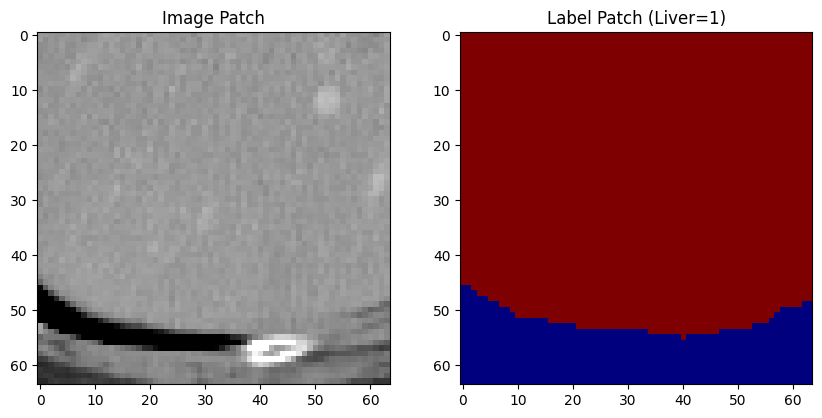

In [4]:
plt.figure(figsize=(10, 5))
# 取第一个样本，第 16 层切片
plt.subplot(1, 2, 1)
plt.imshow(images[0, 0, :, :, 16], cmap="gray")
plt.title("Image Patch")

plt.subplot(1, 2, 2)
plt.imshow(labels[0, 0, :, :, 16], cmap="jet")
plt.title("Label Patch (Liver=1)")
plt.show()

### 4. 第二个data函数

In [2]:
train_loader, val_loader = get_loaders2(data_root='../data', stage='liver', batch_size=2, cache=False)

数据准备完成: 训练集 111 例 | 验证集(来自test文件夹) 20 例


monai.transforms.spatial.dictionary Orientationd.__init__:labels: Current default value of argument `labels=(('L', 'R'), ('P', 'A'), ('I', 'S'))` was changed in version None from `labels=(('L', 'R'), ('P', 'A'), ('I', 'S'))` to `labels=None`. Default value changed to None meaning that the transform now uses the 'space' of a meta-tensor, if applicable, to determine appropriate axis labels.


In [3]:
from monai.utils import first 
# iter() 和 next() 是 Python 获取迭代器数据的标准写法

batch_data = first(train_loader)   # MONAI 的帮助函数，等同于 next(iter(loader))

images = batch_data["image"]
labels = batch_data["label"]

print(f"Image Shape: {images.shape}")   # 应该是 (2, 1, 96, 96, 32) -> Batch, Channel, H, W, D
print(f"Label Shape: {labels.shape}")

'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.


Image Shape: torch.Size([8, 1, 64, 64, 64])
Label Shape: torch.Size([8, 1, 64, 64, 64])


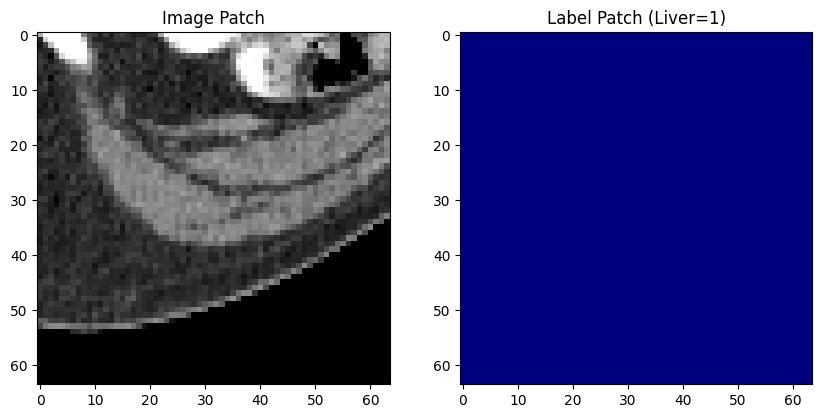

In [5]:
plt.figure(figsize=(10, 5))
# 取第一个样本，第 16 层切片
plt.subplot(1, 2, 1)
plt.imshow(images[0, 0, :, :, 16], cmap="gray")
plt.title("Image Patch")

plt.subplot(1, 2, 2)
plt.imshow(labels[0, 0, :, :, 16], cmap="jet")
plt.title("Label Patch (Liver=1)")
plt.show()